In [1]:
# We'll be analyzing a data set consisting of house prices in Boston

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from sklearn.datasets import load_boston

In [6]:
# Load the housing dataset
boston = load_boston()

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
boston.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

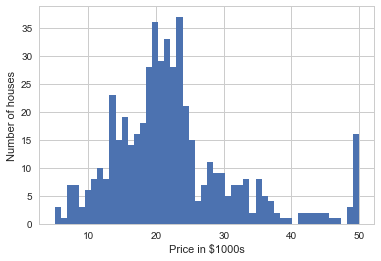

In [9]:
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target,bins=50)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

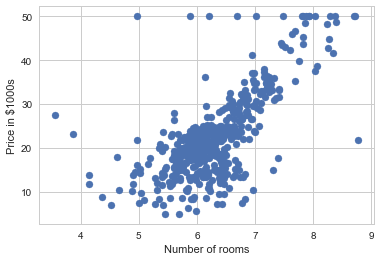

In [10]:
# Plot the column at the 5 index (Labeled RM)
plt.scatter(boston.data[:,5],boston.target)

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [11]:
# reset data as pandas DataFrame
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
# Set price column for target
boston_df['Price'] = boston.target

In [13]:
# Show result
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


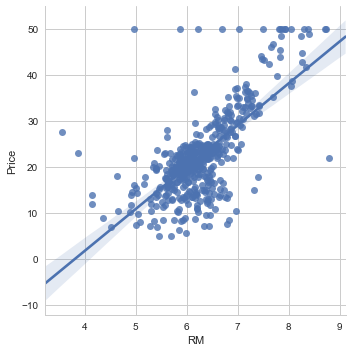

In [14]:
# Using seabron to create a linear fit
sns.lmplot('RM','Price',data = boston_df)

In [16]:
#y=mx+b
#y=mx+b
 
#which we can rewrite using matrices:
#y=Ap
#y=Ap
#where:
#A=[x1]
#and p=[mb]
# we are going to do the same previous job but with numpy

In [18]:
# Set up X as median room values
X = boston_df.RM

# Use v to make X two-dimensional
X = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses.
Y = boston_df.Price
# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ] )


In [20]:
# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y)[0]

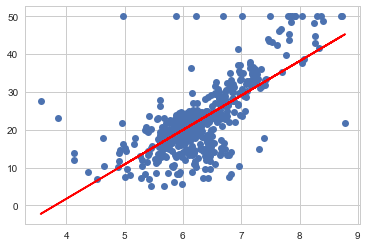

In [21]:
# First the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Next the best fit line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

In [23]:
#Getting the error in our fitted line

In [22]:
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 6.60 


In [24]:
# Using scikit learn to implement a multivariate regression

In [25]:
import sklearn
from sklearn.linear_model import LinearRegression

In [26]:
lreg = LinearRegression()

In [27]:
#The functions we will be using are:
#lreg.fit() which fits a linear model
#lreg.predict() which is used to predict Y using the linear model with estimated coefficients
#lreg.score() which returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model

In [28]:
# Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price

In [29]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The estimated intercept coefficient is 36.49 
 The number of coefficients used was 13 


In [31]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [33]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,boston_df.Price)

In [38]:
#Using Training and Validation
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [39]:
#Predicting Prices

In [40]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [42]:
 print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 42.29
Fit a model X_train, and calculate MSE with X_test and Y_test: 47.85


In [43]:
#Residual Plots
#Residual=Observedvalue−Predictedvalue

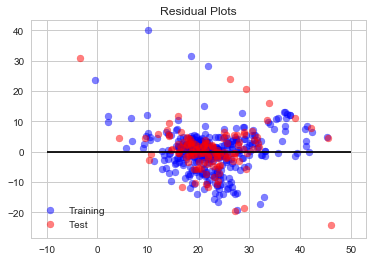

In [44]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

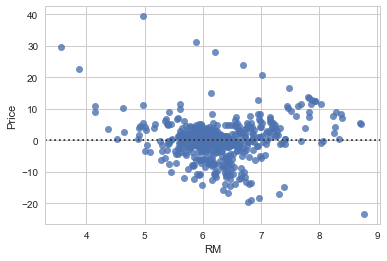

In [46]:
# Residual plot of all the dataset using seaborn ...answerig the same previous question
sns.residplot('RM', 'Price', data = boston_df)